# Crime project

In [139]:
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd /content/drive/My Drive/CRIME PROJECT/CODE/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




## Data inspection

In [185]:
df = pd.read_csv('crimedata2 (1).csv', encoding = 'latin-1')
df.head()




,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [184]:
print(df[['assaultPerPop','state','Êcommunityname']].max())

print(df['assaultPerPop'].min())

assaultPerPop                  ?
state                         WY
Êcommunityname    Zanesvillecity
dtype: object
0


In [141]:
#find sixa and frequency
print(df['assaultPerPop'].count())

print(df['assaultPerPop'].value_counts(dropna=True))

2215
assaultPerPop
0         18
?         13
143.5      2
9.48       2
83.46      2
          ..
154.42     1
33.09      1
477.55     1
90.6       1
102.05     1
Name: count, Length: 2150, dtype: int64


In [ ]:

print(df['assaultPerPop'].value_counts(dropna=True))



assaultPerPop
0         18
?         13
143.5      2
9.48       2
83.46      2
          ..
154.42     1
33.09      1
477.55     1
90.6       1
102.05     1
Name: count, Length: 2150, dtype: int64


Count null values

## Data Preperation

* Check for non numeric and remove

In [143]:
# Convert all columns to numeric, coercing non-numeric entries to NaN
data_numeric = df.apply(pd.to_numeric, errors='coerce')

# Replace '?' with NaN
data_numeric.replace('?', pd.NA, inplace=True)

# Identify any non-numeric values in assaultsperpop
non_numeric = df[df['assaultPerPop'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)




Empty DataFrame
Columns: [Êcommunityname, state, countyCode, communityCode, fold, population, householdsize, racepctblack, racePctWhite, racePctAsian, racePctHisp, agePct12t21, agePct12t29, agePct16t24, agePct65up, numbUrban, pctUrban, medIncome, pctWWage, pctWFarmSelf, pctWInvInc, pctWSocSec, pctWPubAsst, pctWRetire, medFamInc, perCapInc, whitePerCap, blackPerCap, indianPerCap, AsianPerCap, OtherPerCap, HispPerCap, NumUnderPov, PctPopUnderPov, PctLess9thGrade, PctNotHSGrad, PctBSorMore, PctUnemployed, PctEmploy, PctEmplManu, PctEmplProfServ, PctOccupManu, PctOccupMgmtProf, MalePctDivorce, MalePctNevMarr, FemalePctDiv, TotalPctDiv, PersPerFam, PctFam2Par, PctKids2Par, PctYoungKids2Par, PctTeen2Par, PctWorkMomYoungKids, PctWorkMom, NumKidsBornNeverMar, PctKidsBornNeverMar, NumImmig, PctImmigRecent, PctImmigRec5, PctImmigRec8, PctImmigRec10, PctRecentImmig, PctRecImmig5, PctRecImmig8, PctRecImmig10, PctSpeakEnglOnly, PctNotSpeakEnglWell, PctLargHouseFam, PctLargHouseOccup, PersPerOccupHo

* check for and remove duplicates

In [144]:
# Check for duplicates
duplicates = data_numeric.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data_numeric.drop_duplicates(inplace=True)



Number of duplicate rows: 0


In [180]:
print(data_numeric[['assaultPerPop','state','Êcommunityname']].max()-3)

print(data_numeric['assaultPerPop'].min())


assaultPerPop     4929.5
state                NaN
Êcommunityname       NaN
dtype: float64
0.0


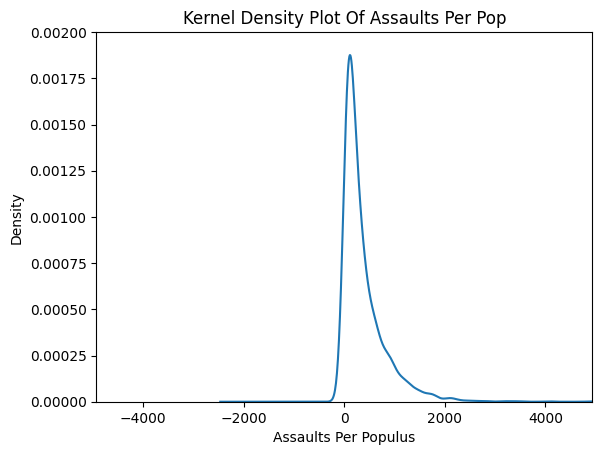

In [175]:
data_numeric['assaultPerPop'].plot(kind='kde')


plt.xlim(-4932,4932)
plt.ylim(0, 0.002)  # Set y-axis range

# Add labels and title
plt.xlabel("Assaults Per Populus")
plt.ylabel("Density")
plt.title("Kernel Density Plot Of Assaults Per Pop")

plt.show()

* identify nominal varialbes and convert remaining columnes to numeric

In [102]:
# Identify nominal variables to exclude
nominal_columns = ['Êcommunityname', 'state']

# Keep only numeric columns for analysis
data_numeric = data_numeric.drop(columns=nominal_columns)

# Convert relevant columns to numeric, coercing errors to NaN
# This step is not strictly necessary since we've already coerced everything to numeric
# but it can be useful to ensure specific columns are converted correctly.
numeric_columns = data_numeric.select_dtypes(include=[np.number]).columns.tolist()



for col in numeric_columns:
    data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Check for any remaining non-numeric values
for column in numeric_columns:
    non_numeric = df[column].isna().sum()
    print(f"NaN values in column '{column}': {non_numeric}")

# Handle missing values (using mean imputation for simplicity)
data_numeric.fillna(data_numeric.mean(), inplace=True)

NaN values in column 'countyCode': 0
NaN values in column 'communityCode': 0
NaN values in column 'fold': 0
NaN values in column 'population': 0
NaN values in column 'householdsize': 0
NaN values in column 'racepctblack': 0
NaN values in column 'racePctWhite': 0
NaN values in column 'racePctAsian': 0
NaN values in column 'racePctHisp': 0
NaN values in column 'agePct12t21': 0
NaN values in column 'agePct12t29': 0
NaN values in column 'agePct16t24': 0
NaN values in column 'agePct65up': 0
NaN values in column 'numbUrban': 0
NaN values in column 'pctUrban': 0
NaN values in column 'medIncome': 0
NaN values in column 'pctWWage': 0
NaN values in column 'pctWFarmSelf': 0
NaN values in column 'pctWInvInc': 0
NaN values in column 'pctWSocSec': 0
NaN values in column 'pctWPubAsst': 0
NaN values in column 'pctWRetire': 0
NaN values in column 'medFamInc': 0
NaN values in column 'perCapInc': 0
NaN values in column 'whitePerCap': 0
NaN values in column 'blackPerCap': 0
NaN values in column 'indianPer

* check for and remove outliers

In [103]:
# Check for outliers
for col in numeric_columns:
    Q1 = data_numeric[col].quantile(0.25)
    Q3 = data_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_numeric[(data_numeric[col] < lower_bound) | (data_numeric[col] > upper_bound)]
    print(f"Outliers in column '{col}': {len(outliers)}")

Outliers in column 'countyCode': 176
Outliers in column 'communityCode': 991
Outliers in column 'fold': 0
Outliers in column 'population': 219
Outliers in column 'householdsize': 93
Outliers in column 'racepctblack': 252
Outliers in column 'racePctWhite': 88
Outliers in column 'racePctAsian': 240
Outliers in column 'racePctHisp': 268
Outliers in column 'agePct12t21': 153
Outliers in column 'agePct12t29': 151
Outliers in column 'agePct16t24': 206
Outliers in column 'agePct65up': 38
Outliers in column 'numbUrban': 165
Outliers in column 'pctUrban': 0
Outliers in column 'medIncome': 43
Outliers in column 'pctWWage': 25
Outliers in column 'pctWFarmSelf': 117
Outliers in column 'pctWInvInc': 2
Outliers in column 'pctWSocSec': 19
Outliers in column 'pctWPubAsst': 76
Outliers in column 'pctWRetire': 34
Outliers in column 'medFamInc': 63
Outliers in column 'perCapInc': 111
Outliers in column 'whitePerCap': 119
Outliers in column 'blackPerCap': 72
Outliers in column 'indianPerCap': 133
Outliers

In [104]:
#Remove outliers using Z-score
for col in numeric_columns:
    z_scores = np.abs((data_numeric[col] - data_numeric[col].mean()) / data_numeric[col].std())
    outliers = data_numeric[z_scores > 3]
    print(f"Outliers in column '{col}': {len(outliers)}")

Outliers in column 'countyCode': 27
Outliers in column 'communityCode': 0
Outliers in column 'fold': 0
Outliers in column 'population': 15
Outliers in column 'householdsize': 41
Outliers in column 'racepctblack': 57
Outliers in column 'racePctWhite': 37
Outliers in column 'racePctAsian': 51
Outliers in column 'racePctHisp': 66
Outliers in column 'agePct12t21': 48
Outliers in column 'agePct12t29': 51
Outliers in column 'agePct16t24': 55
Outliers in column 'agePct65up': 25
Outliers in column 'numbUrban': 15
Outliers in column 'pctUrban': 0
Outliers in column 'medIncome': 28
Outliers in column 'pctWWage': 14
Outliers in column 'pctWFarmSelf': 44
Outliers in column 'pctWInvInc': 1
Outliers in column 'pctWSocSec': 10
Outliers in column 'pctWPubAsst': 32
Outliers in column 'pctWRetire': 19
Outliers in column 'medFamInc': 28
Outliers in column 'perCapInc': 38
Outliers in column 'whitePerCap': 41
Outliers in column 'blackPerCap': 23
Outliers in column 'indianPerCap': 24
Outliers in column 'Asi

*** **make sure values have been properley remvove and reassgin dataframe**

In [112]:

df.replace("?", np.nan, inplace=True)

df.dropna(inplace=True)


null_counts = data_numeric.apply(lambda x : x.isna().sum())
print(null_counts)

newdf = data_numeric



countyCode             0
communityCode          0
fold                   0
population             0
householdsize          0
                      ..
autoTheftPerPop        0
arsons                 0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
Length: 145, dtype: int64


## Assigning variables 


In [106]:
#these variables contain data about variables that directly impact/represent familial relations
family_df = df[['PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PersPerOccupHous']]
family_df

family_df.isna().sum()

PersPerFam          0
PctFam2Par          0
PctKids2Par         0
PctYoungKids2Par    0
PctTeen2Par         0
PersPerOccupHous    0
dtype: int64

In [107]:
#next step is to identify possible correlations between violent crimes
crimes_df = df[['assaultPerPop']]
crimes_df


,assaultPerPop
54,368.86
55,445.86
58,522.63
99,964.85
122,1111.77
...,...
2086,93.92
2097,94.96
2116,106.54
2200,567.21


In [ ]:
null_counts = crimes_df.apply(lambda x : x.isna().sum())
print(null_counts)



assaultPerPop    0
dtype: int64


# Descision tree


* Variable search

In [109]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn import tree
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import export_graphviz
import graphviz

In [110]:
X = family_df
y = crimes_df

for col in X.columns:
  pd.to_numeric(X[col], errors='coerce')

for col in y.columns:
  pd.to_numeric(y[col], errors='coerce')

In [ ]:
top_features = corrAssault[corrAssault > 0.5].index

# Create a new correlation matrix with only the top features
top_corr_matrix = data_cleaned[top_features].corr()

# Print top correlations with AssaultPerPop
print(top_corr_matrix['assaultPerPop'].sort_values(ascending=False))


(88, 6)
(23, 6)
(88, 1)
(23, 1)
Mean Squared Error: 109595.66228260871
R^2 Score: 0.007203264808796961


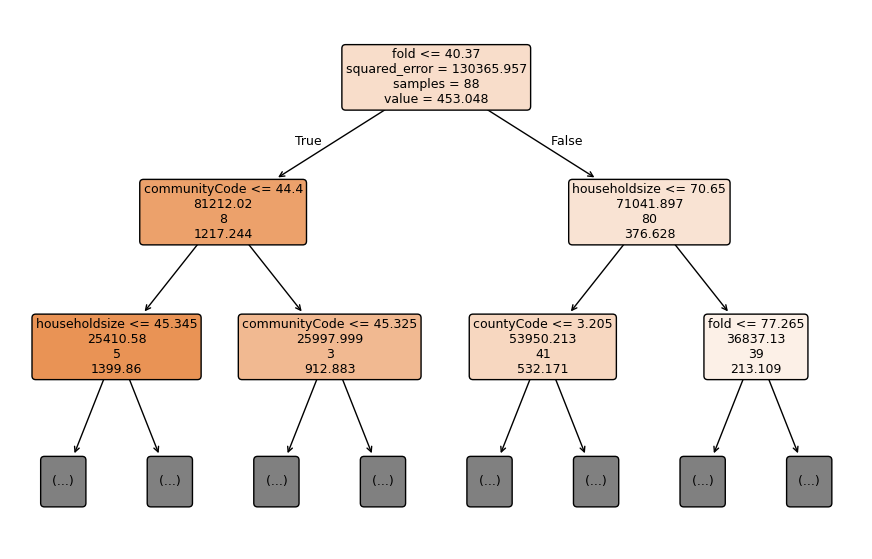

In [113]:
regressor = DecisionTreeRegressor()

#randomize and evenly split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


#train the data we've just split
#X_train_imputed = imputer.fit_transform(X_train)
#X_test_imputed = imputer.transform(X_test)

#fit the model to trained data
regressor.fit(X_train, y_train)


#predict
y_pred = regressor.predict(X_test)


#model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

#coloring to maintain repot constostency

#dot_data = export_graphviz(regressor, out_file= None, feature_names= X.columns,  filled=True, rounded=True,  special_characters=True)


#graph = graphviz.Source(dot_data)

#graph.format = 'png'  # Output format (e.g., png, pdf, svg, etc.)

#graph.render('decision_tree')

#plot the fig
plt.figure(figsize=(11,7))
tree.plot_tree(regressor,fontsize = 9, filled=True, feature_names= newdf.columns,max_depth=2, label="root",rounded=True)
plt.show()


## Correlation matrix